Preprocessing

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
# import dataset
df = pd.read_csv('diabetes_health.csv', delimiter=',')
df.dataframeName = 'diabetes_health.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 47276 rows and 23 columns


In [32]:
df.shape

(47276, 23)

In [27]:
# valeur manquant
print(f'Colonnes avec valeurs manquantes : { df.isnull().sum()} .')

Colonnes avec valeurs manquantes : Unnamed: 0              0
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 .


In [28]:
lignes_dupliquees = df.duplicated()
print(df[lignes_dupliquees])

Empty DataFrame
Columns: [Unnamed: 0, Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 23 columns]


In [29]:
print(f'Les valeurs que prend la cible sont {df["Diabetes_012"].unique()} ')
diabetes_target = df["Diabetes_012"]

Les valeurs que prend la cible sont [2 0 1] 


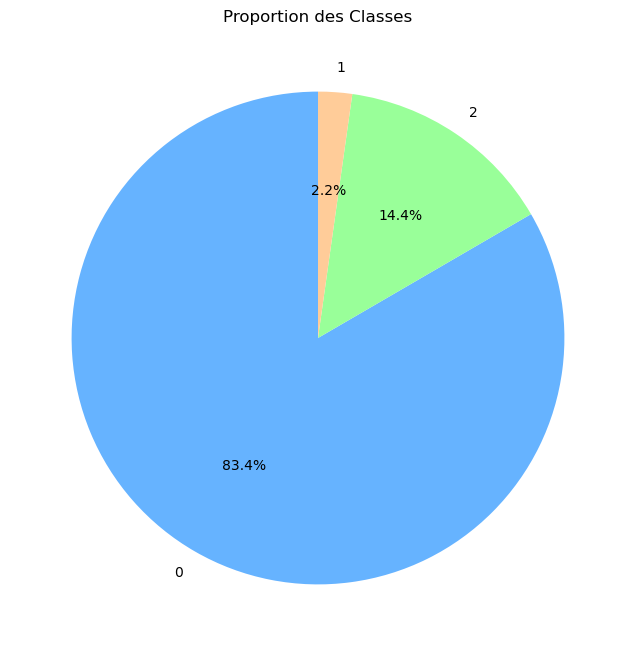

In [8]:
counts = diabetes_target.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Proportion des Classes')
plt.show()

on remarque que la dataset est desequilibre 

In [14]:
colonnes_catégorielles = df.select_dtypes(include=['object']).columns

#print("Colonnes catégorielles :")
print(colonnes_catégorielles)

Index([], dtype='object')


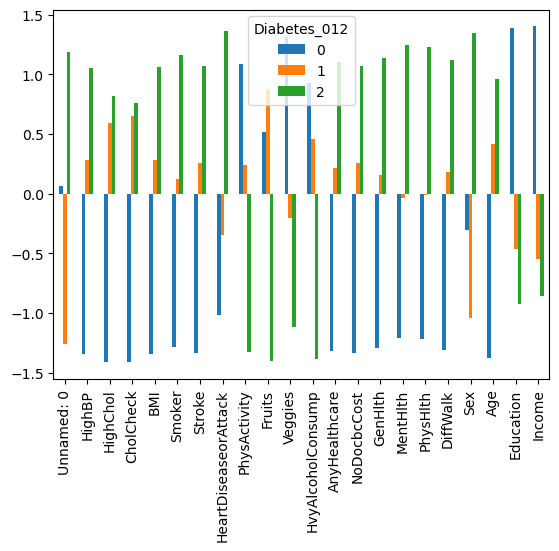

In [21]:
from scipy.stats import zscore

df_grouped = df.groupby(["Diabetes_012"]).mean().apply(lambda col: zscore(col))

df_grouped.T.plot.bar()
plt.show()

df_0 = df[df["Diabetes_012"] == 0]
df_1 = df[df["Diabetes_012"] == 1]
df_2 = df[df["Diabetes_012"] == 2]

X_0 = df_0.drop("Diabetes_012", axis=1)
X_1 = df_1.drop("Diabetes_012", axis=1)
X_2 = df_2.drop("Diabetes_012", axis=1)

X_0_normalized = X_0.apply(lambda col: zscore(col))
X_1_normalized = X_1.apply(lambda col: zscore(col))
X_2_normalized = X_2.apply(lambda col: zscore(col))



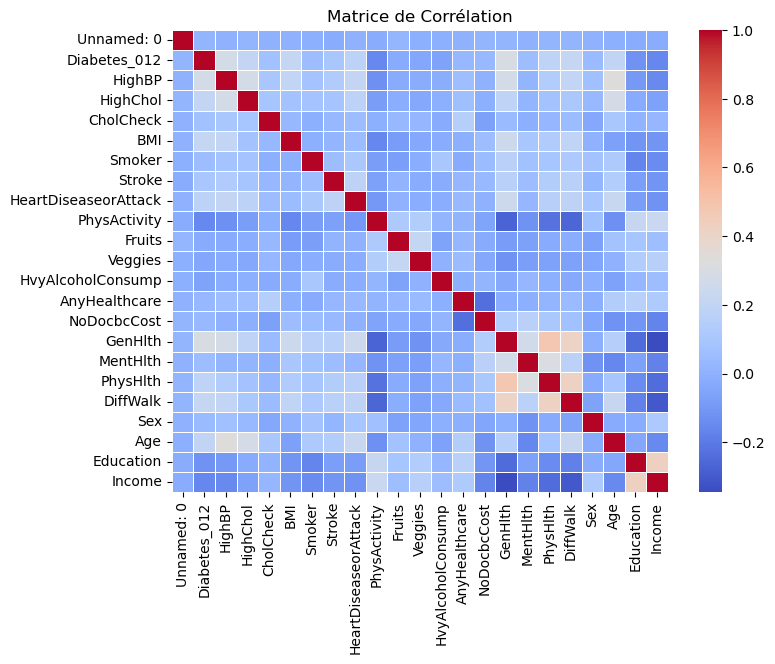

In [22]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [23]:
#fonction pour évaluation de méthodes
def error_rate(modele,y_test,X_test):
    #prediction
    y_pred = modele.predict(X_test)
    #taux d'erreur
    err = 1.0 - metrics.accuracy_score(y_test,y_pred)
    #return
    return err
#fin fonction

def evaluation(modele,y_test,X_test):
    print('Error rate of {} = {}'.format(modele, error_rate(modele,y_test, X_test)))
    y_probabilities = dtree.predict_proba(X_test)[:, 1]
    print('AUC of {} = {}'.format(modele,roc_auc_score(y_test, y_probabilities)))

In [24]:
df = df.drop("Diabetes_012", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, , stratify=y, random_state=42)